<div class="alert alert-block alert-info">
<font size="5">
<center><b>АНАЛИЗ БД КРУПНОГО СЕРВИСА ДЛЯ ЧТЕНИЯ КНИГ ПО ПОДПИСКЕ</b></center>
</font>
    </div> 

<span class="mark">**Описание проекта:**</span>

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

<span class="mark">**Задача:**</span>

**Провести анализ баз данных и сформулировать ценностное предложение для нового продукта**
* Посчитать, сколько книг вышло после 1 января 2000 года;
* Для каждой книги посчитать количество обзоров и среднюю оценку;
* Определим издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры;
* Определим автора с самой высокой средней оценкой книг — учитем только книги с 50 и более оценками;
* Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок.


<span class="mark">**Описание данных:**</span>

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

![g](https://i.stack.imgur.com/x4fOR.png)




<span class="mark">**Оглавление:**</span>

* [1. Изучение входных данных](#num1)
* [2. Исследование данных (EDA)](#num2)
    * [2.1. Подсчитаем количество книг, которые вышли после 1 января 2000 года](#num3)
    * [2.2. Подсчитаем количество обзоров и средней оценки книги](#num4)
    * [2.3. Определим издательство, которое выпустило наибольшее число книг толще 50 страниц](#num5)
    * [2.4. Определим автора с самой высокой средней оценкой книг](#num6)
    * [2.5. Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок](#num7)   
* [3. Общий вывод и рекомендации](#result) 

<a name="num1"></a>
# Изучение входных данных

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [2]:
# Сделаем функцию для вывода данных по запросу

def Q(sql):
    return pd.io.sql.read_sql(sql, con = engine)

**Выведем в цикле первые пять строк каждой таблицы**

In [3]:
for item in ['books', 'authors', 'publishers', 'ratings', 'reviews']:
    query = 'SELECT * FROM ' + item + ' LIMIT 5;'
    display(pd.io.sql.read_sql(query, con = engine))

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


**Проверим типы данных, пропуски и дубликаты**

In [4]:
# Загрузим таблицы и присвоим имена
books = ''' SELECT * FROM books'''
authors = ''' SELECT * FROM authors'''
publishers = ''' SELECT * FROM publishers'''
rating = ''' SELECT * FROM ratings'''
reviews = ''' SELECT * FROM reviews'''

# Через цикл выведим информацию 
for df in [Q(books), Q(authors), Q(publishers), Q(rating), Q(reviews)]:
    display(df.info(), df.duplicated().sum(), df.isna().sum())
    print('*****************************************')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


None

0

book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64

*****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


None

0

author_id    0
author       0
dtype: int64

*****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


None

0

publisher_id    0
publisher       0
dtype: int64

*****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


None

0

rating_id    0
book_id      0
username     0
rating       0
dtype: int64

*****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


None

0

review_id    0
book_id      0
username     0
text         0
dtype: int64

*****************************************


<span class="mark">**Наблюдение:**</span> В таблицах не обнаружены пропуски и дубликаты. В таблице `books` необходимо изменить тип данных столбца `publication_date` на `datetime`.

In [5]:
book = pd.io.sql.read_sql(books, con = engine)
book['publication_date'] = pd.to_datetime(book['publication_date'], format='%Y-%m-%d')
book['publication_year'] = book['publication_date'].astype('datetime64[Y]')

In [6]:
# Через цикл выведим информацию 
for df in [Q(books)]:
    display(df.info())
    print('*****************************************')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


None

*****************************************


In [7]:
date = '''
SELECT
TITLE,
publication_date
from books b
order by publication_date desc
'''

Q(date)

,title,publication_date
0,A Quick Bite (Argeneau #1),2020-03-31
1,The Art of Loving,2019-08-06
2,Monster,2019-03-05
3,Women,2014-07-29
4,Ham on Rye,2014-07-29
...,...,...
995,Brideshead Revisited,1982-01-30
996,Homage to Catalonia,1980-10-22
997,The Shining,1980-07-01
998,The Philosophy of Andy Warhol (From A to B and...,1977-04-06


<a name="num2"></a>
# Исследование данных (EDA)

<a name="num3"></a>
## Подсчитаем количество книг, которые вышли после 1 января 2000 года

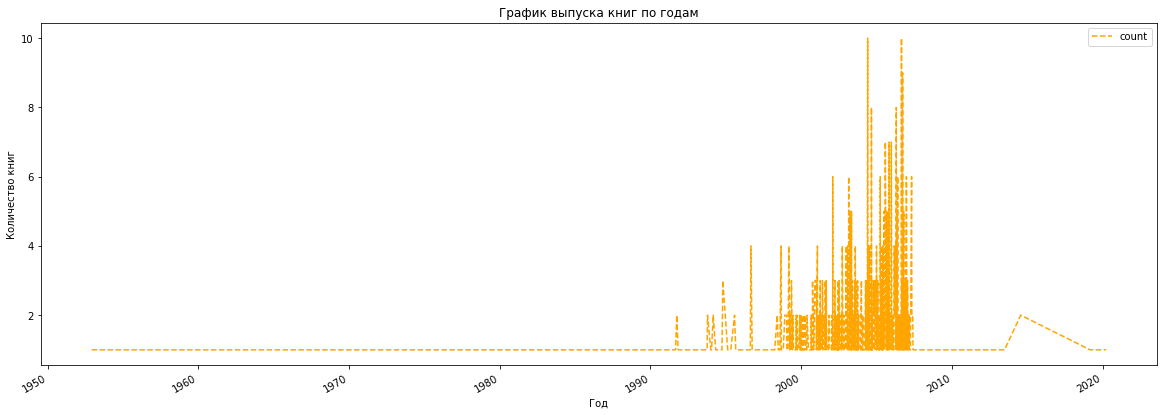

In [8]:
# Сгруппируем данные по дате публикации 

book_group = book.groupby('publication_date').agg({'book_id': ['count']})

# Построим график
book_group['book_id'].plot(style='--', figsize=(20, 7), color = 'orange')
plt.title('График выпуска книг по годам')
plt.xlabel('Год')
plt.ylabel('Количество книг')
plt.show()

In [9]:
Q_after_2000 = '''
SELECT COUNT(book_id) AS b_сount 
FROM books b
WHERE publication_date::date > '2000-01-01';
'''
Q(Q_after_2000)

,b_сount
0,819


<span class="mark">**Наблюдение:**</span> Основной выпуск книг пришелся на 2005-2008 года. После 1 января 2000 года было опубликовано **819 книг**.

<a name="num4"></a>
## Подсчитаем количество обзоров и средней оценки книги

Найдем общее количество обзоров по книгам и средний рейтинг по ним
Будем использовать метод объединения таблиц `LEFT JOIN`

In [10]:
Q_review = '''
SELECT
tab.title,
count(tab.title),
round(avg, 1) AS avg

FROM(
    SELECT 
    b.book_id,
    b.title,
    avg(rat.rating)

    FROM books b
    LEFT JOIN ratings AS rat on b.book_id = rat.book_id

    GROUP by b.book_id) AS tab 

LEFT JOIN reviews AS rev on tab.book_id = rev.book_id

GROUP by tab.book_id, tab.title, avg
ORDER by count(tab.title) desc

'''
Q(Q_review)

,title,count,avg
0,Twilight (Twilight #1),7,3.7
1,The Hobbit or There and Back Again,6,4.1
2,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.4
3,Outlander (Outlander #1),6,4.1
4,The Giver (The Giver #1),6,3.8
...,...,...,...
995,Death: The High Cost of Living,1,3.0
996,Anne Rice's The Vampire Lestat: A Graphic Novel,1,3.7
997,Leonardo's Notebooks,1,4.0
998,Phantom (Sword of Truth #10),1,3.5


<span class="mark">**Наблюдение:**</span> Наибольшее количество обзоров у книги **Twilight 7 штук** и её средняя оценка **3.66**.



<a name="num5"></a>
## Определим издательство, которое выпустило наибольшее число книг толще 50 страниц

In [11]:
pages = '''
SELECT publisher AS p,
COUNT(publishers) AS p_number

-- Cоединим таблицы 

FROM publishers
JOIN books ON publishers.publisher_id = books.publisher_id
WHERE num_pages > 50
GROUP BY p
ORDER BY p_number DESC
LIMIT 10;
'''
Q(pages)

,p,p_number
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Ballantine Books,19
5,Bantam,19
6,Berkley,17
7,St. Martin's Press,14
8,Berkley Books,14
9,William Morrow Paperbacks,13


<span class="mark">**Наблюдение:**</span> 
Издательство `Penguin Books` выпустило 42 книги толще 50 листов.

<a name="num6"></a>
## Определим автора с самой высокой средней оценкой книг

Определим автора с самой высокой средней оценкой книг — учтем только книги с 50 и более оценками

Для выполнения задачи будем использовать две таблицы `books` и `ratings` (объединение таблиц методом `INNER JOIN`), используя подзапрос `WHERE IN` куда добавим таблицу со срезом рейтингов болеее 50 на одну книгу и потом сделаем группировку по автору и отсортируем таблицы по убыванию.

In [22]:
author = '''
SELECT
a.author,
ROUND(AVG(rat.rating),2),
COUNT(b.title)

FROM books AS b
INNER JOIN authors AS a on b.author_id = a.author_id
INNER JOIN ratings AS rat on b.book_id = rat.book_id

-- Сделаем срез по количеству рейтингов на одну книгу, где кол-во рейтингой более 50
WHERE b.book_id IN
                    (SELECT
                    b.book_id
                    
                    FROM books AS b
                    INNER JOIN ratings AS rat on b.book_id = rat.book_id
                    GROUP BY b.book_id
                    HAVING COUNT(rat.rating) >= 50) 
GROUP BY a.author
ORDER BY AVG(rat.rating) desc;
'''
Q(author)

,author,round,count
0,J.K. Rowling/Mary GrandPré,4.29,310
1,Markus Zusak/Cao Xuân Việt Khương,4.26,53
2,J.R.R. Tolkien,4.25,162
3,Louisa May Alcott,4.19,52
4,Rick Riordan,4.08,62
5,William Golding,3.90,71
6,J.D. Salinger,3.83,86
7,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.79,57
8,William Shakespeare/Paul Werstine/Barbara A. M...,3.79,66
9,Lois Lowry,3.75,56


<span class="mark">**Наблюдение:**</span> Автором с самой высокой средней оценкой книг является **J.K. Rowling/Mary GrandPré**.	

<a name="num7"></a>
## Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [24]:
aver_review = '''
SELECT 
ROUND(AVG(count),2) as average

FROM 
           (SELECT COUNT(text) 
            FROM reviews 
            FULL OUTER JOIN (SELECT username, 
            COUNT(rating_id) as cnt 

FROM ratings 
GROUP BY username) AS cnt_rating ON cnt_rating.username = reviews.username 
WHERE cnt > 50 
GROUP BY reviews.username) as count 
'''
Q(aver_review)

,average
0,24.33


<span class="mark">**Наблюдение:**</span>
Среднее количестово обзоров от пользователей, которые поставили больше 50 оценок составило - **24 обзора**.

<a name="num8"></a>
# Общий вывод и рекомендации

**`ВЫВОД`**: 
<div style="border:solid orange 2px; padding: 20px"> 
После анализа данных можно сделать следующие выводы:
    
* Основной объем книг на сервере был выпущен в период с 2000 по 2008 года.
* **819 книг или 80%** вышли после 1 января 2000 года.
* Наибольшее количество обзоров у книги **Twilight 7 штук** и её средняя оценка 3.66.
* Издательство Penguin Books выпустило 42 книги, на втором месте **Vintage (31 книги)** и на третьем месте **Grand Central Publishing (25 книг)**.
* Автором с самой высокой средней оценкой книг 4.29 является **J.K. Rowling/Mary GrandPré** 
* Среднее количестово обзоров от пользователей, которые поставили больше 50 оценок составило - **24 обзора**.
    
<span class="pirk">Рекомендация:</span>
На момент анализа БД, большая чась книг выпущена 20-23 года назад, что возможно уже неактуально для читателей и не принесет высокие продажи. Стоит пересмотреть продуктовую линейку и увеличить объем книг на более современный со сроком издания 1-3 года.
    
</div>